In [1]:
import numpy as np
import pandas as pd
import os, time

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA as PCAs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.features import PCA as PCAy
import matplotlib as mpl
import numpy as np
import math

#%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('datasets/wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.skew()

Alcohol                -0.051482
Malic_Acid              1.039651
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               1.098191
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.868585
Hue                     0.021091
OD280                  -0.307285
Proline                 0.767822
dtype: float64

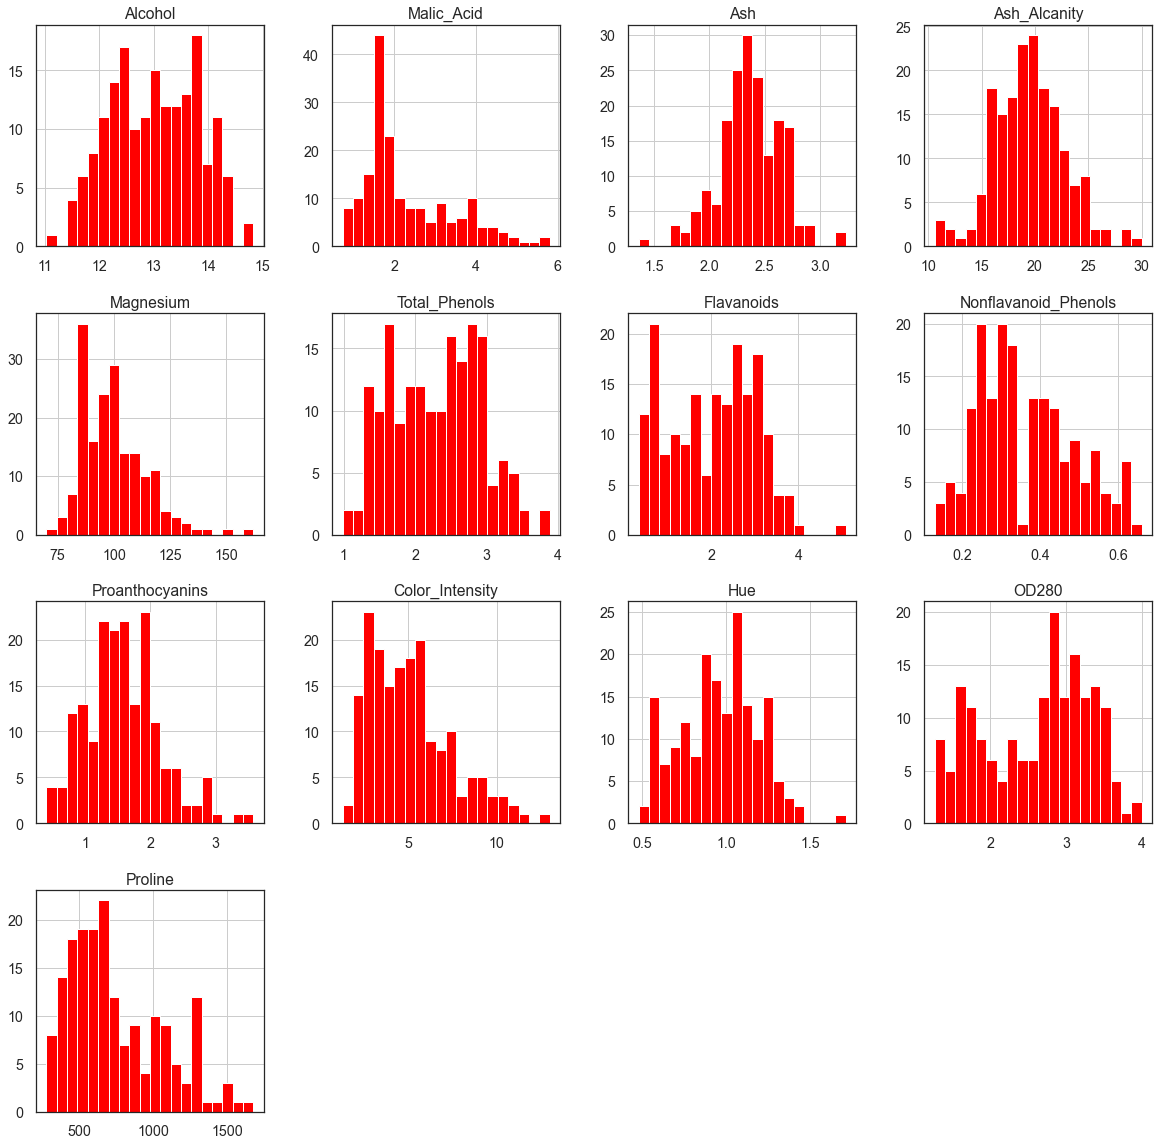

In [4]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=df.hist(bins=20,color='red' )

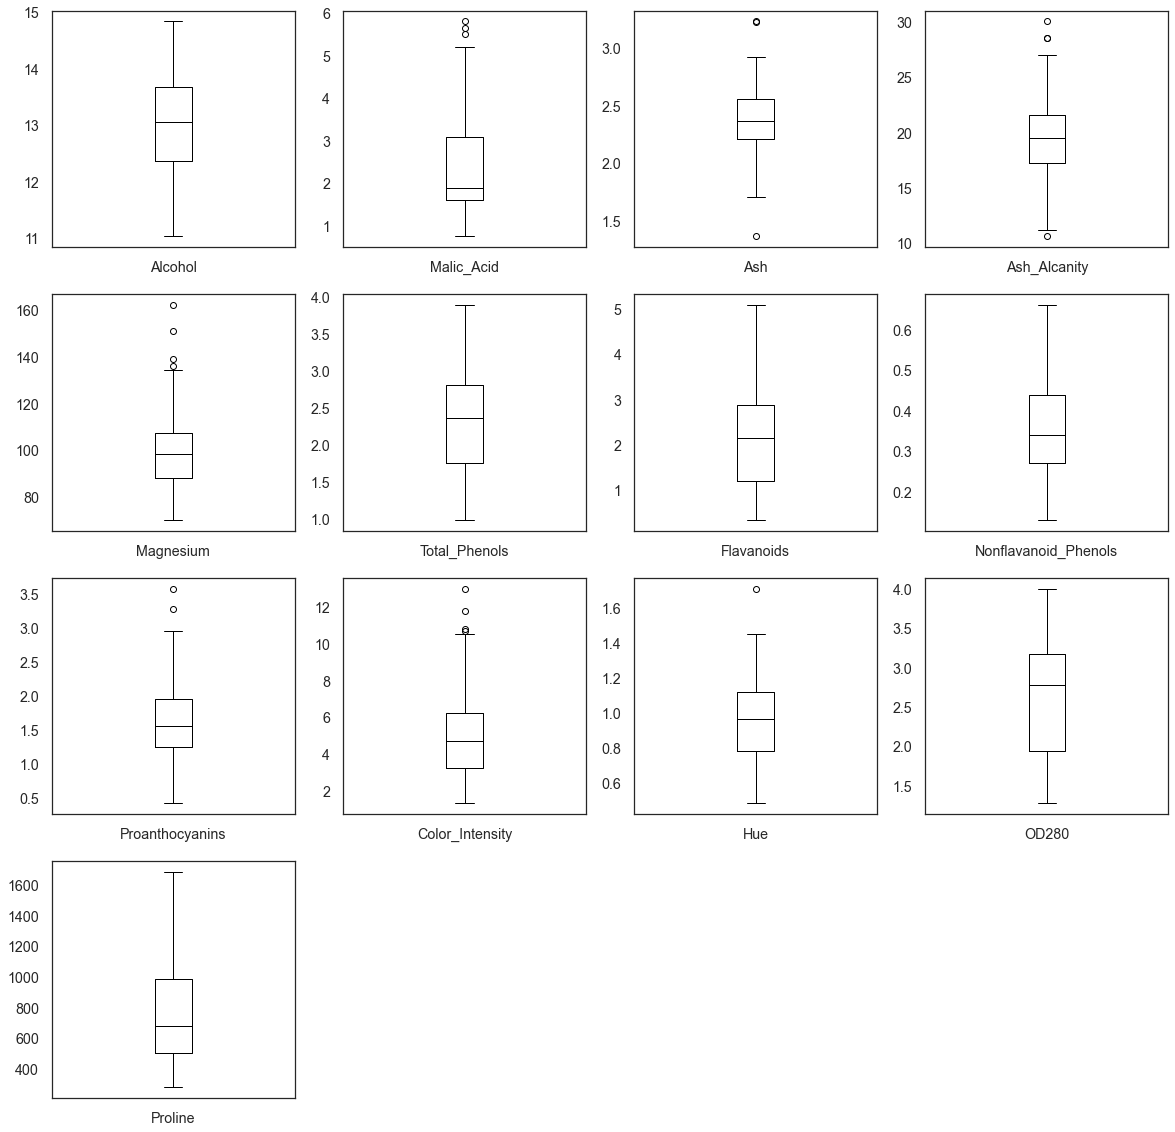

In [5]:
df.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black');

In [6]:
ss = StandardScaler()

ss.fit(df)

StandardScaler()

In [7]:
df_pp = pd.DataFrame(ss.transform(df), columns=df.columns)
df_pp.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [8]:
random_state=42
np.random.seed(42)
metrics = dict(inertia=[], silhouette=[])

for cluster in range(2, 21):
    pipe = Pipeline(steps=[
        ('pca', PCAs(n_components=0.9, random_state=random_state)),
        ('clustering', KMeans(n_clusters=cluster, init='k-means++', n_init=2, random_state=random_state))
    ])
    pipe.fit(df_pp)
    clusters = pipe.predict(df_pp)
    inertia = pipe.named_steps['clustering'].inertia_
    labels = pipe.named_steps['clustering'].labels_
    silhouette = silhouette_score(df_pp, labels, metric='euclidean', sample_size=20)
    metrics['inertia'].append(inertia)
    metrics['silhouette'].append(silhouette)
    metrics['cluster'] = cluster
    print(f'{cluster} - inertia={inertia:.3f} silhouette={silhouette:.3f}')

2 - inertia=1475.401 silhouette=0.260
3 - inertia=1095.227 silhouette=0.324
4 - inertia=1012.186 silhouette=0.260
5 - inertia=924.828 silhouette=0.225
6 - inertia=900.792 silhouette=0.104
7 - inertia=836.339 silhouette=0.111
8 - inertia=801.719 silhouette=0.049
9 - inertia=754.334 silhouette=0.237
10 - inertia=697.809 silhouette=0.169
11 - inertia=670.009 silhouette=0.063
12 - inertia=631.537 silhouette=0.034
13 - inertia=595.585 silhouette=0.122
14 - inertia=582.720 silhouette=0.086
15 - inertia=567.222 silhouette=-0.003
16 - inertia=546.002 silhouette=0.081
17 - inertia=521.165 silhouette=0.139
18 - inertia=519.060 silhouette=0.022
19 - inertia=502.788 silhouette=0.079
20 - inertia=480.603 silhouette=0.042


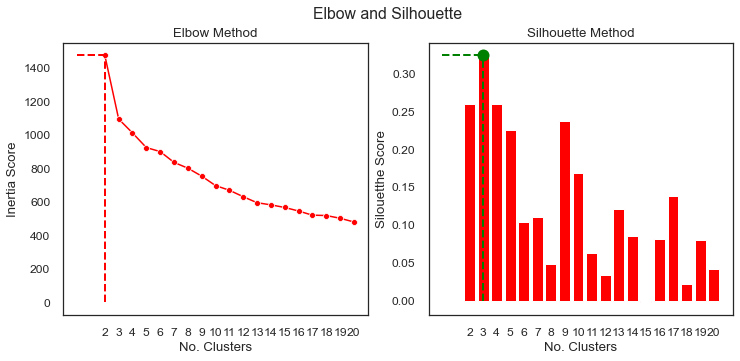

In [9]:
sns.set(style='white',font_scale=1.1, rc={'figure.figsize':(12,5)})
fig, ax = plt.subplots(1, 2)
max_inertia = max(metrics['inertia'])
max_silhouette = max(metrics['silhouette'])
inertia_cluster = metrics['inertia'].index(max_inertia) + 2
silhouette_cluster = metrics['silhouette'].index(max_silhouette) + 2

plt.subplot(1,2,1)
ax[0] = sns.lineplot(range(2, 21), metrics['inertia'], color='red', marker='o')
ax[0].set_xticks(range(2,21))
plt.plot([0, inertia_cluster], 2*[max_inertia], '--', linewidth=2, markersize=12, color='red')
plt.plot([inertia_cluster, inertia_cluster], [0,max_inertia], '--', linewidth=2, markersize=12, color='red')
plt.title('Elbow Method')
plt.xlabel('No. Clusters')
plt.ylabel('Inertia Score')

plt.subplot(1,2,2)
ax[1] = plt.bar(range(2,21), height=metrics['silhouette'], color='red')
plt.plot(silhouette_cluster, max_silhouette, 'o', linewidth=2, markersize=12, color='green')
plt.plot([0, silhouette_cluster], 2*[max_silhouette], '--', linewidth=2, markersize=12, color='green')
plt.plot([silhouette_cluster, silhouette_cluster], [0,max_silhouette], '--', linewidth=2, markersize=12, color='green')
plt.xticks(range(2,21))

plt.title('Silhouette Method')
plt.suptitle('Elbow and Silhouette')
plt.xlabel('No. Clusters')
plt.ylabel('Silouetthe Score')
plt.show()

In [10]:
pipe = Pipeline(steps=[
    ('pca', PCAs(n_components=0.9, random_state=random_state)),
    ('clustering', KMeans(n_clusters=3, init='k-means++', n_init=2, random_state=random_state))
])

pipe.fit(df_pp)

Pipeline(steps=[('pca', PCA(n_components=0.9, random_state=42)),
                ('clustering',
                 KMeans(n_clusters=3, n_init=2, random_state=42))])

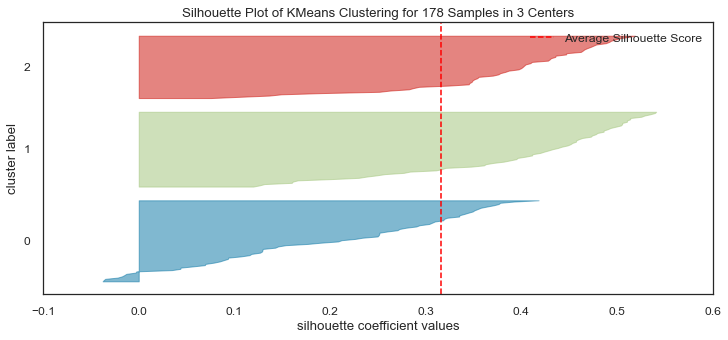

In [11]:
pca = pipe.named_steps['pca']
df_pca = pca.transform(df_pp)
kmns = pipe.named_steps['clustering']
visualizer = SilhouetteVisualizer(kmns, colors='yellowbrick')

visualizer.fit(df_pca)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

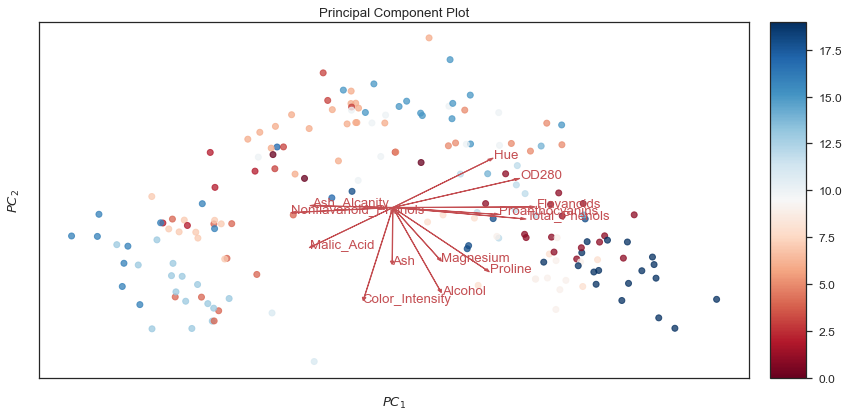

In [12]:
plt.figure(figsize=(12,6))
visualizer = PCAy(scale=True, proj_features=True)
visualizer.fit_transform(df_pp, clusters)
visualizer.show();

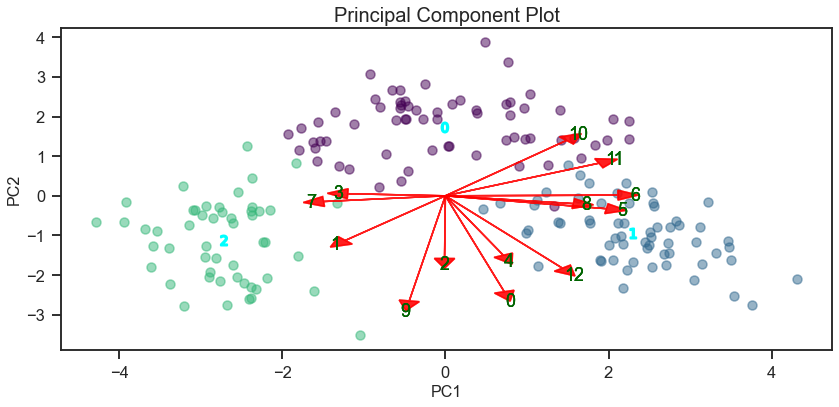

In [13]:
pca = pipe.named_steps['pca'] 
algo = pipe.named_steps['clustering']

def biplot_list(pca, algo, df_scaled, segs_list=[None], scale_list=[None], cluster_list=[None], figsize=(12,6), components=(0,1)):
    sns.set_theme(style="ticks", context="talk", palette="rocket")
    
    
    pcx, pcy = components
    feature_names = df_scaled.columns
    segs = feature_names if segs_list==[None] else segs_list
    
    index_filter = df_scaled.columns.isin(segs)
    features_to_show = feature_names[index_filter]
    scale = len(features_to_show)*[5] if scale_list==[None] else len(features_to_show)*scale_list
    fig, ax = plt.subplots(figsize=figsize)
    
    df_pca = pca.transform(df_scaled)
    v = pd.DataFrame(pca.components_.T, index=feature_names) # features, components
    

    clusters = pipe.predict(df_pp)
    centroids = pipe.named_steps['clustering'].cluster_centers_
    n_clusters = len(centroids)
    
    algo_has_attr = True if hasattr(pipe.named_steps['clustering'], 'cluster_centers_indices_') else False
    if algo_has_attr:
        clusters_centers_indices  = pipe.named_steps['clustering'].cluster_centers_indices_
    
    # plot components
    cluster_list = range(n_clusters) if cluster_list==[None] else cluster_list
    
    colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, n_clusters+1)))
    for _, clust in zip(colors, cluster_list):
        df_pca_n_cluster = df_pca[clusters==clust]
        centroids_n_cluster = centroids[clust]        
        n_clusters = clusters[clusters==clust]
        
        color = colors.by_key()['color'][clust]
        # plot components
        scatter = ax.scatter(df_pca_n_cluster[:, pcx], df_pca_n_cluster[:, pcy], color=color, alpha=0.5) # color['color']
        if algo_has_attr:
            for pt in df_pca_n_cluster:
                plt.plot([centroids_n_cluster[pcx], pt[pcx]], [centroids_n_cluster[pcy], pt[pcy]], color=color) #color['color']
            
        #legend = ax.legend(*scatter.legend_elements(), loc="upper right", bbox_to_anchor=(1.2, clust*0.05 + 0.02))
        #ax.add_artist(legend)
        
        # mark centroids
        plt.scatter(centroids[clust, pcx], centroids[clust, pcy], marker="$%d$" % clust, s=100, linewidths=2, color="cyan", zorder=10)
        
        # plot arrow
        for n_feature, feature in enumerate(features_to_show):
            x, y = scale[n_feature]*v.loc[feature, pcx], scale[n_feature]*v.loc[feature, pcy] 
            plt.arrow(0, 0, x, y, color = 'red', alpha = 0.5, head_length=0.25, head_width=0.25)
            plt.text(x*1.1, y*1.1, n_feature, color='darkgreen', ha='center', va='center')


    
    ax.set_xlabel(f'PC{pcx+1}', fontsize=16)
    ax.set_ylabel(f'PC{pcy+1}', fontsize=16)
    ax.set_title('Principal Component Plot', fontsize=20)
    plt.tight_layout()
    plt.show()
    arrow_dict = dict(zip(range(len(features_to_show)), features_to_show))
    return fig, arrow_dict

# scale_list <= number of features
# cluster_list <= number of clusters
# segs_list <= feature names to graph



_, arrow_dict = biplot_list(pca, algo, df_pp, scale_list=[None], cluster_list=[None], segs_list=[None], components=(0, 1));

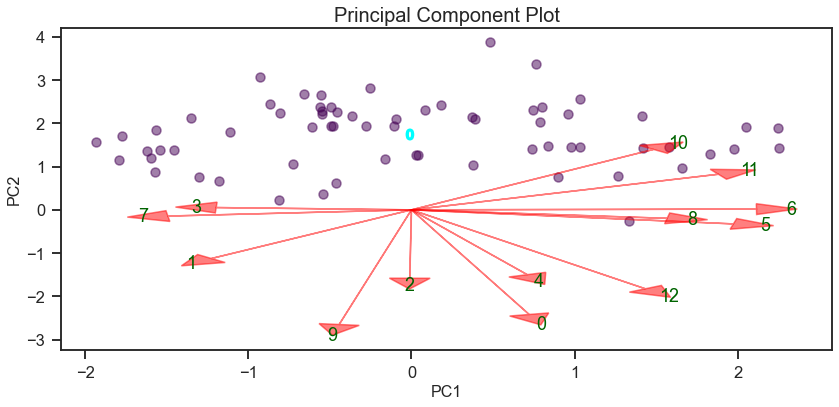

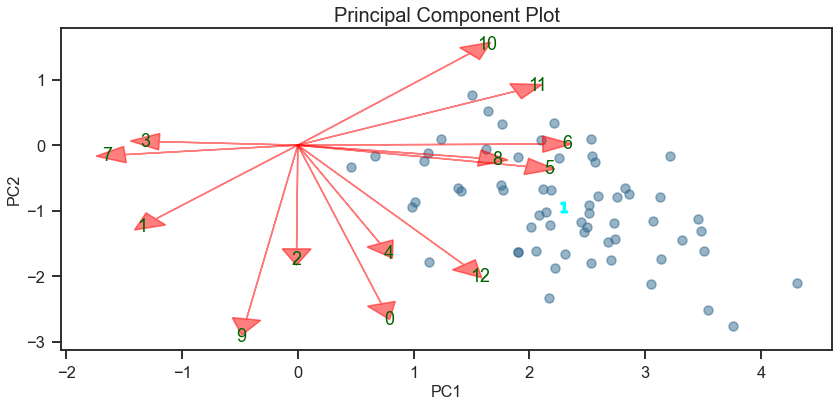

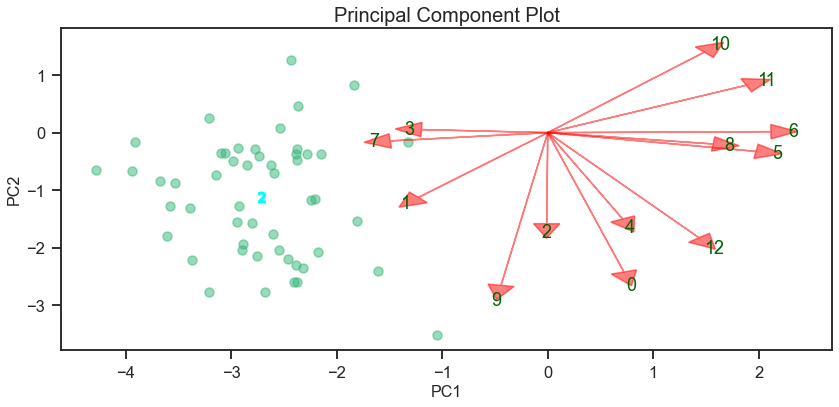

In [15]:
for i in range(pipe.named_steps['clustering'].n_clusters):
    algo = pipe.named_steps['clustering']
    _, arrow_dict = biplot_list(pca, algo, df_pp, scale_list=[5], cluster_list=[i], segs_list=[None], components=(0, 1));